# Fast Fourier Transform 
### Applies fast fourier Transformations (also known as discrete fourier transformations) to the flow of the bees



The first goal is to apply fast fourier transformations to the bee population and see the results.
The steps are:

1) Import the needed libraries

2) Load the data in from the csv

3) Apply the FFT to the data with a chosen sample rate and spacing

4) Plot the results



done


/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


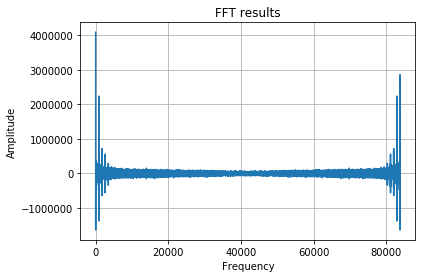

In [19]:
#imports needed librarys
from scipy.fftpack import fft, ifft
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("done")

#load the data
#import pandas as pd 
data = pd.read_csv("/home/user/Downloads/BeePredictor-Derek_Private/data/cleaned/schwartau/schwartau.csv") 
data.tail()
#puts the data into an array
dataArray = data["flow"].tolist()
dataTime = data["timestamp"].tolist()

# Number of sample points
N = 8000
# sample spacing
T = 1.0 / 400.0

y = dataArray #np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
ys = 2.0/N * np.abs(yf[0:N//2])
xf = np.linspace(0.0, N//2, N//2)

plt.plot(yf)
plt.title("FFT results")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.grid()
plt.show()


Next step is to fix the result of the FFT so it makes more sense. The complex values need to be changed to real numbers and the second half of the data needs to be discarded because it is a mirror of the first half. Also, all the noisy data in the middle can be ignored and the beginning can be focused in on. 

378
562.449214374837
8.338467863634316e-09


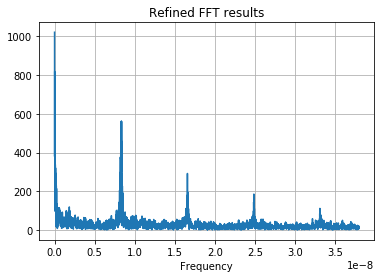

In [20]:
#finds the y values
N = 8000 #number choosen to cut hou much of the y axis is shown
yf = fft(dataArray) #the fast fourie transformation
yg = 2.0/N * np.abs(yf[0:N//2]) #adjusted to show on a graph

#Makes the x axis. this is somewhat arbitrary 
res = 83784 * 15 #the number that makes the x axis
x = np.linspace(0, 1/res, len(dataArray))
xg = x[:N//2]

#Finds local maximun location and value withing the start and end value
sta = 500
end = 4000
maxVal = np.argmax(yg[sta:end])
print(maxVal)           #value
print(yg[(maxVal+sta)]) #location in array
print(xg[maxVal+sta])   #value location on the x axis

#plots the data
plt.title("Refined FFT results")
plt.xlabel("Amplitude")
plt.xlabel("Frequency")
plt.plot(xg,yg)
plt.grid()
plt.show()
#plt.savefig('fft.png')

Here is a failed attempt at plotting the sine wave. I stopped trying to fix it once I realized the data would tell us nothing of relevance

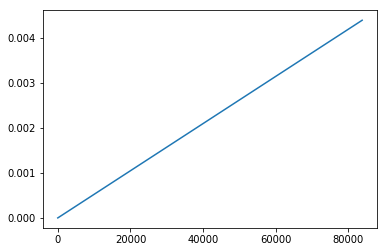

In [13]:
fs = 83784 # sample rate 
f = 8.338467863634316e-09 * 83784 # the frequency of the signal

x = np.arange(fs) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = np.sin(2*np.pi*f * (x/fs)) 

#this instruction can only be used with IPython Notbook. 
% matplotlib inline
# showing the exact location of the smaples
#plt.stem(x,y, 'r', )
plt.plot(x,y)
